In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-times-india-news-analysis/new_york_times_india.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS


In [3]:
df = pd.read_csv('/kaggle/input/new-york-times-india-news-analysis/new_york_times_india.csv')

In [4]:
df.head()

,Headline,Description
0,Tesla Earnings Report Could Add to Concerns Ab...,Analysts expect first-quarter results to show ...
1,Why Did Modi Call India’s Muslims ‘Infiltrator...,The brazenness of Prime Minister Narendra Modi...
2,Modi Calls Muslims ‘Infiltrators’ Who Would Ta...,The direct language used against the country’s...
3,‘Discomfort May Increase’: Asia’s Heat Wave Sc...,April is typically hot in South and Southeast ...
4,India to Redo Voting at Polling Stations Hit b...,"The attacks occurred in Manipur, a northeaster..."


In [5]:
df.dtypes

Headline       object
Description    object
dtype: object

In [6]:
df.isna().sum()

Headline       0
Description    0
dtype: int64

In [7]:
contextual_stopwords = ['company','friday','forced','defend','government','hard','letter','C E','home','start','day','time','people','profit','year','month','city','app','car','answer','years','sharing','allies','months','report','guy','lot','ve','began']

In [8]:
stopwords700 = ["enclosed", "every", "word", "in", "double", "quotes", "and", "add", "comma", "after", "x", "y", "your", "yours", "yourself", "yourselves", "you", "yond", "yonder", "yon", "ye", "yet", "z", "zillion", "j", "u", "umpteen", "usually", "us", "username", "uponed", "upons", "uponing", "upon", "ups", "upping", "upped", "up", "unto", "until", "unless", "unlike", "unliker", "unlikest", "under", "underneath", "use", "used", "usedest", "r", "rath", "rather", "rathest", "rathe", "re", "relate", "related", "relatively", "regarding", "really", "res", "respecting", "respectively", "q", "quite", "que", "qua", "n", "neither", "neaths", "neath", "nethe", "nethermost", "necessary", "necessariest", "necessarier", "never", "nevertheless", "nigh", "nighest", "nigher", "nine", "noone", "nobody", "nobodies", "nowhere", "nowheres", "no", "noes", "nor", "nos", "no-one", "none", "not", "notwithstanding", "nothings", "nothing", "nathless", "natheless", "t", "ten", "tills", "till", "tilled", "tilling", "to", "towards", "toward", "towardest", "towarder", "together", "too", "thy", "thyself", "thus", "than", "that", "those", "thou", "though", "thous", "thouses", "thoroughest", "thorougher", "thorough", "thoroughly", "thru", "thruer", "thruest", "thro", "through", "throughout", "throughest", "througher", "thine", "this", "thises", "they", "thee", "the", "then", "thence", "thenest", "thener", "them", "themselves", "these", "therer", "there", "thereby", "therest", "thereafter", "therein", "thereupon", "therefore", "their", "theirs", "thing", "things", "three", "two", "o", "oh", "owt", "owning", "owned", "own", "owns", "others", "other", "otherwise", "otherwisest", "otherwiser", "of", "often", "oftener", "oftenest", "off", "offs", "offest", "one", "ought", "oughts", "our", "ours", "ourselves", "ourself", "out", "outest", "outed", "outwith", "outs", "outside", "over", "overallest", "overaller", "overalls", "overall", "overs", "or", "orer", "orest", "on", "oneself", "onest", "ons", "onto", "a", "atween", "at", "athwart", "atop", "afore"]

In [9]:
stopwords192 = list(STOPWORDS)

In [10]:
# 2000 more stopwords
#list of 2000 stopwords
stopwords2000 = ["able", "about", "above", "across", "actually", "add", "added", "adding", "additional", "after", "again", "against", "ago", "ahead", "ain't", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "aren't", "around", "as", "aside", "ask", "asking", "associated", "at", "available", "away", "awfully", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "big", "both", "brief", "but", "by", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "changes", "clearly", "c'mon", "co", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "course", "currently", "definitely", "described", "despite", "did", "didn't", "different", "do", "does", "doesn't", "doing", "don't", "done", "down", "downwards", "during", "each", "edu", "eg", "eight", "either", "else", "elsewhere", "entirely", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "far", "few", "fifth", "first", "five", "followed", "following", "follows", "for", "former", "formerly", "forth", "four", "from", "further", "furthermore", "get", "gets", "getting", "given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "had", "hadn't", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "here's", "hereupon", "hers", "herself", "he's", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "i'd", "ie", "if", "ignored", "i'll", "i'm", "immediate", "in", "inasmuch", "inc", "indeed", "indicate", "indicated", "indicates", "indicate", "indicating", "inner", "insofar", "instead", "into", "inward", "is", "isn't", "it", "it'd", "it'll", "its", "itself", "i've", "just", "keep", "keeps", "kept", "know", "known", "knows", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "let's", "like", "liked", "likely", "likewise", "little", "look", "looking", "looks", "low", "lower", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "meanwhile", "merely", "might", "million", "miss", "missed", "misses", "missing", "modified", "moi", "more", "moreover", "most", "mostly", "mr", "mrs", "ms", "much", "must", "mustn't", "my", "myself", "namely", "nd", "near", "nearly", "necessary", "need", "needed", "needing", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "no-one", "nor", "normally", "not", "nothing", "novel", "now", "nowhere", "o'clock", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "on", "once", "one", "one's", "only", "onto", "opposite", "or", "other", "others", "otherwise", "ought", "oughtn't", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "p", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "possible", "presumably", "probably", "provided", "provides", "put", "q", "que", "quite", "qv", "r", "rather", "rd", "re", "really", "reasonably", "recent", "recently", "regarding", "regardless", "regards", "relatively", "respectively", "right", "round", "s", "said", "same", "saw", "say", "saying", "says", "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "since", "six", "so", "some", "somebody", "someday", "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specified", "specify", "specifying", "still", "sub", "such", "sup", "sure", "", "t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "there'd", "therefore", "therein", "there'll", "there're", "theres", "there's", "thereupon", "there've", "these", "they", "they'd", "they'll", "they're", "they've", "thing", "things", "think", "third", "thirty", "this", "thorough", "thoroughly", "those", "though", "three", "through", "throughout", "thru", "thus", "till", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "t's", "twice", "two", "u", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "uses", "using", "usually", "uucp", "v", "value", "various", "versus", "very", "via", "viz", "vs", "w", "want", "wants", "was", "wasn't", "way", "we", "we'd", "welcome", "well", "we'll", "went", "were", "we're", "weren't", "we've", "what", "whatever", "what'll", "what's", "what've", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "where's", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whither", "who", "who'd", "whoever", "whole", "who'll", "whom", "whomever", "who's", "whose", "why", "will", "willing", "wish", "with", "within", "without", "wonder", "won't", "would", "wouldn't", "x", "y", "yes", "yet", "you", "you'd", "you'll", "your", "you're", "yours", "yourself", "yourselves", "you've", "z", "zero"]

In [11]:
stopwords_bulk = stopwords700 + stopwords192 + stopwords2000+contextual_stopwords
stopwords_bulk = set(stopwords_bulk)

In [12]:
headline_data = "".join(df['Headline'])
description_data = ''.join(df['Description'])
whole_text_data = headline_data+description_data

In [13]:
wordcloud = WordCloud(width=800,height=400,background_color='white',stopwords=stopwords_bulk).generate(whole_text_data)

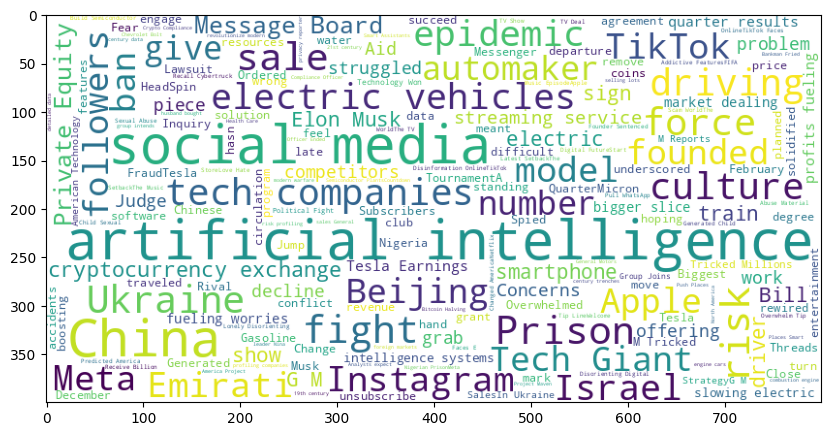

In [14]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()